# Initilization

In [ ]:
!!pip install xgboost lightgbm --quiet
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import svm
from sklearn.metrics import mean_squared_log_error
import pickle
from sklearn.utils import resample
from sklearn.cluster import MiniBatchKMeans
from xgboost import XGBRegressor

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
data_dir = '/content/drive/MyDrive/Machine/data'
os.listdir(data_dir)

['sample_submission.csv',
 'train.csv',
 'test.csv',
 'submission_1000000.csv',
 'submission_500000.csv',
 'submission_100000.csv',
 'submission_1456603_1.csv',
 'train_processed.csv',
 'test_processed.csv',
 'submission_svm_100000.csv',
 'submission_linear_regression_100000.csv',
 'submission_linear_regression_500000.csv',
 'submission_linear_regression_50000.csv',
 'submission_linear_regression_10000.csv',
 'submission_linear_regression_1456603.csv',
 'submission_linear_svm_1456603.csv',
 'submission_xgboost_1456603.csv',
 'gpu_submission_xgboost_1450089.csv']

In [ ]:
train_dir = data_dir + '/train.csv'
train_df = pd.read_csv(train_dir)
train_df.sample(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
598751,id0906998,1,2016-02-19 19:17:50,2016-02-19 19:25:04,1,-73.978188,40.729549,-73.987648,40.722778,N,434
716413,id2986328,2,2016-03-13 09:30:17,2016-03-13 09:34:54,5,-73.992203,40.735523,-73.981995,40.732040,N,277
504558,id0302746,2,2016-01-29 07:48:40,2016-01-29 08:04:22,1,-74.006081,40.717304,-73.984085,40.755047,N,942
1020773,id3624553,2,2016-06-15 21:16:17,2016-06-15 21:45:30,2,-74.011108,40.715012,-73.954948,40.616112,N,1753
1438197,id3947071,2,2016-01-26 10:50:42,2016-01-26 11:02:11,3,-73.959122,40.763451,-73.967598,40.762901,N,689
785892,id0278253,1,2016-02-15 18:07:12,2016-02-15 18:17:31,1,-73.976479,40.751076,-73.990044,40.756554,N,619
1411066,id2843208,2,2016-03-12 12:49:31,2016-03-12 12:52:27,1,-73.967972,40.792568,-73.977631,40.786350,N,176
269665,id1710468,2,2016-02-09 18:06:43,2016-02-09 18:20:03,1,-74.007500,40.726173,-73.990868,40.755836,N,800
681362,id1900303,1,2016-01-05 21:56:12,2016-01-05 22:00:32,1,-74.000763,40.735985,-74.000351,40.744492,N,260
580805,id2023881,1,2016-01-31 04:07:41,2016-01-31 04:22:40,2,-73.988091,40.719929,-73.952461,40.776264,N,899


In [ ]:
test_dir = data_dir + '/test.csv'
test_df = pd.read_csv(test_dir)
test_df.sample(10)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
553342,id3749814,2,2016-01-22 19:39:28,1,-73.957405,40.770317,-73.956284,40.778057,N
505277,id1085325,2,2016-02-07 11:50:15,1,-73.997124,40.736790,-73.991562,40.744598,N
120588,id0422420,1,2016-05-25 13:14:13,1,-73.971634,40.760052,-73.995865,40.732456,N
378121,id0267423,1,2016-03-13 22:38:45,1,-73.991417,40.744629,-73.987709,40.768398,N
206637,id0629071,2,2016-05-01 11:44:03,2,-73.973808,40.753101,-73.982170,40.742962,N
604577,id0760482,2,2016-01-07 21:17:10,1,-73.970299,40.761978,-73.979752,40.744656,N
39631,id0866915,1,2016-06-18 20:18:17,2,-73.984650,40.726418,-73.962952,40.804165,N
299221,id0221637,2,2016-04-05 13:49:05,1,-73.976204,40.754673,-74.015076,40.711391,N
550352,id0082196,2,2016-01-24 23:02:55,1,-73.972351,40.794170,-73.939034,40.802071,N
205623,id2721732,1,2016-05-01 16:59:10,1,-73.987068,40.725182,-73.998314,40.733025,N


In [ ]:
# Statistical summary of the data
pd.set_option('display.float_format', lambda x: '%.3f' % x)
train_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1458644.000,1458644.000,1458644.000,1458644.000,1458644.000,1458644.000,1458644.000
mean,1.535,1.665,-73.973,40.751,-73.973,40.752,959.492
std,0.499,1.314,0.071,0.033,0.071,0.036,5237.432
min,1.000,0.000,-121.933,34.360,-121.933,32.181,1.000
25%,1.000,1.000,-73.992,40.737,-73.991,40.736,397.000
50%,2.000,1.000,-73.982,40.754,-73.980,40.755,662.000
75%,2.000,2.000,-73.967,40.768,-73.963,40.770,1075.000
max,2.000,9.000,-61.336,51.881,-61.336,43.921,3526282.000


In [ ]:
# Get a description of the columns, number of rows, and number of null values.
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


# Data Cleaning

From the statistical summay, we can see that most of the features are normal except the trip_duration. It has a minimum of 1 second and a maximum of 3526282 seconds (980 hours = 40.8 days). No way someone can take a trip that long using a taxi. Also, a 1 second will not get you anywhere. So, we need to remove the outliers for the trip_duration.

The pickup_datetime feature seems very interesting because we can extract the hour of the day, the day of the week, and the day of the month from it. For example, the trip time differs most likely to be affected if the trip at the peak hour or if it's at a winter month.

The passenger_count feature is an interesting feature because an increased number of passenger may leads to an increased number of stops which may extend the trip time between the starting and ending points.

The vendor_id is a code indicating the provider associated with the trip record. Different vendors may provide different shortest path routes. Some vendor may provide a corrupted information of the shortest path but I think this is highly unlikely to happen.

The store_and_fwd_flag flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server. Maybe there is a relationship between slow trips and server disconnects so we may consider this feature in the training.

The pickup_longitude, pickup_latitude, dropoff_longitude, and dropoff_latitude are the most important features that give value to the model training. We can use them to calculate different types of distances to get a heuristics about the real trip distance which effectively affects the trip duration.

## Remove outliers in the trip duration

In [ ]:
# Remove outliers in the trip duration.
# We've decided to exclude data that lies outside n_std standard deviations from the mean. 
# We can try different n_std to see what would be the effect on the end-results.
n_std = 5
train_mean = np.mean(train_df['trip_duration'])
train_std = np.std(train_df['trip_duration'])
train_df = train_df[(train_mean - n_std * train_std <= train_df.trip_duration) & (train_df.trip_duration <= train_mean + n_std * train_std)]
train_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1456603.000,1456603.000,1456603.000,1456603.000,1456603.000,1456603.000,1456603.000
mean,1.534,1.664,-73.973,40.751,-73.973,40.752,837.601
std,0.499,1.314,0.071,0.033,0.071,0.036,669.457
min,1.000,0.000,-121.933,34.360,-121.933,32.181,1.000
25%,1.000,1.000,-73.992,40.737,-73.991,40.736,397.000
50%,2.000,1.000,-73.982,40.754,-73.980,40.755,662.000
75%,2.000,2.000,-73.967,40.768,-73.963,40.770,1073.000
max,2.000,9.000,-61.336,51.881,-61.336,43.921,27064.000


## Convert dates to pd format

In [ ]:
# Convert dates to pd format so we can easily manipulate them
train_df.pickup_datetime = pd.to_datetime(train_df.pickup_datetime)
train_df.loc[:, 'pickup_date'] = train_df.pickup_datetime.dt.date
train_df.dropoff_datetime = pd.to_datetime(train_df.dropoff_datetime)

test_df.pickup_datetime = pd.to_datetime(test_df.pickup_datetime)
test_df.loc[:, 'pickup_date'] = test_df.pickup_datetime.dt.date

In [ ]:
train_df.sample(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date
442212,id0986789,1,2016-03-16 17:12:39,2016-03-16 17:21:59,1,-73.954,40.767,-73.968,40.771,N,560,2016-03-16
1170652,id3736811,2,2016-04-23 16:15:03,2016-04-23 16:38:10,1,-73.990,40.757,-74.017,40.705,N,1387,2016-04-23
2174,id3758615,1,2016-06-02 17:52:39,2016-06-02 17:57:05,1,-73.965,40.770,-73.951,40.782,N,266,2016-06-02
403640,id2695968,1,2016-01-04 12:35:28,2016-01-04 12:52:41,4,-73.983,40.730,-74.010,40.722,N,1033,2016-01-04
231943,id1048611,1,2016-06-17 19:59:14,2016-06-17 20:07:11,1,-73.995,40.740,-73.988,40.752,N,477,2016-06-17
670510,id0787178,2,2016-03-21 10:44:03,2016-03-21 11:02:03,6,-73.979,40.753,-73.998,40.751,N,1080,2016-03-21
359445,id1408643,1,2016-06-15 07:15:55,2016-06-15 07:23:37,2,-73.963,40.763,-73.978,40.763,N,462,2016-06-15
752661,id1952429,1,2016-02-20 23:29:36,2016-02-20 23:46:33,1,-73.981,40.759,-73.958,40.820,N,1017,2016-02-20
347836,id0354515,1,2016-01-20 18:33:45,2016-01-20 18:52:28,1,-73.982,40.773,-73.980,40.748,N,1123,2016-01-20
1434509,id2022814,2,2016-05-12 08:06:43,2016-05-12 08:14:17,1,-73.951,40.786,-73.964,40.795,N,454,2016-05-12


## Split the date to Month, Day, Week, and Hour

In [ ]:
# Split the date to Month, Day, Week, and Hour
def split_date(df):
    df['day'] = df['pickup_datetime'].dt.day
    df['hour'] = df['pickup_datetime'].dt.hour
    df['month'] = df['pickup_datetime'].dt.month
    df['week'] = df['pickup_datetime'].dt.dayofweek
    return df

train_df = split_date(train_df)
test_df = split_date(test_df)

train_df.sample(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,day,hour,month,week
1091344,id1640429,1,2016-04-10 13:10:02,2016-04-10 13:20:26,1,-73.995,40.725,-73.990,40.719,N,624,2016-04-10,10,13,4,6
737367,id3654403,2,2016-04-17 00:34:17,2016-04-17 00:39:19,1,-73.987,40.740,-73.983,40.732,N,302,2016-04-17,17,0,4,6
490759,id0279185,1,2016-04-20 16:21:00,2016-04-20 16:45:38,1,-73.992,40.739,-73.972,40.762,N,1478,2016-04-20,20,16,4,2
1005743,id3518384,1,2016-05-21 17:35:46,2016-05-21 17:44:38,2,-73.991,40.776,-73.973,40.783,N,532,2016-05-21,21,17,5,5
1345111,id1033470,1,2016-03-16 23:36:38,2016-03-16 23:43:25,1,-73.984,40.725,-73.990,40.735,N,407,2016-03-16,16,23,3,2
615113,id1356531,1,2016-03-10 17:54:16,2016-03-10 18:00:44,1,-73.977,40.776,-73.976,40.788,N,388,2016-03-10,10,17,3,3
706399,id0470930,1,2016-02-16 17:47:20,2016-02-16 18:14:28,2,-73.992,40.739,-73.955,40.778,N,1628,2016-02-16,16,17,2,1
519797,id0119482,1,2016-02-20 21:57:24,2016-02-20 22:27:10,1,-73.998,40.719,-73.906,40.772,N,1786,2016-02-20,20,21,2,5
286531,id2771940,1,2016-01-12 17:29:59,2016-01-12 17:43:01,1,-73.980,40.745,-74.006,40.736,N,782,2016-01-12,12,17,1,1
635676,id1176248,1,2016-05-10 08:57:45,2016-05-10 09:02:49,1,-73.959,40.772,-73.956,40.783,N,304,2016-05-10,10,8,5,1


# Data Visualization

In [ ]:
matplotlib.rcParams['figure.figsize'] = (10,6)

def show_hist(col_name):
    plt.hist(train_df[col_name].values, bins=50)
    plt.xlabel(col_name)
    plt.ylabel('count')
    plt.show()

## Histograms

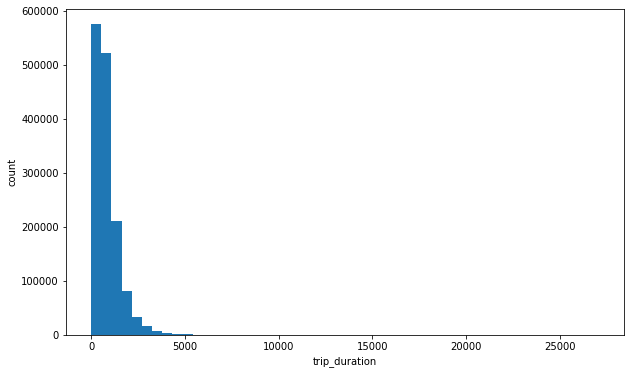

In [ ]:
# Visualize the plain histogram of the trip duration
show_hist('trip_duration')

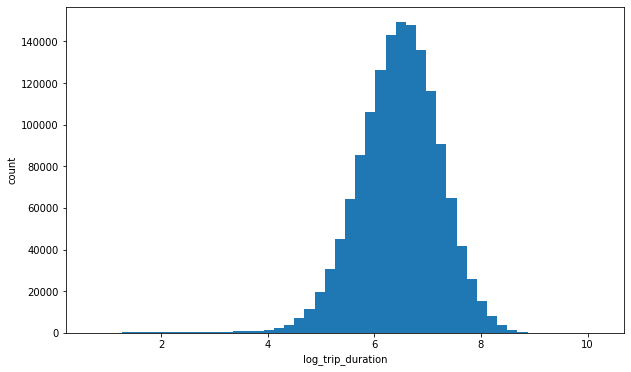

In [ ]:
# Visualize the histogram of the log transformation of the trip duration
# The log transformation may be useful becuase the error metric is the mean squared log error.
train_df['log_trip_duration'] = np.log(train_df['trip_duration'].values + 1)
show_hist('log_trip_duration')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


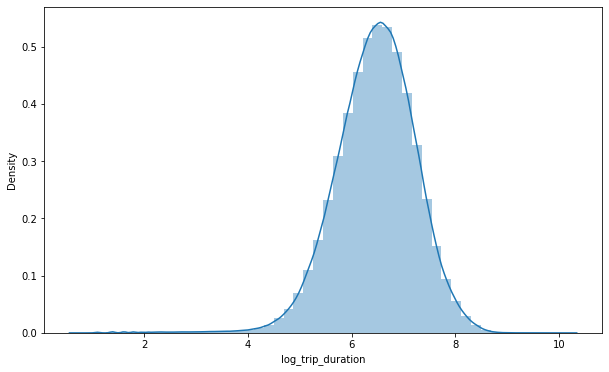

In [ ]:
sns.distplot(train_df["log_trip_duration"], bins =50)

## Timeseries

It's interesting to visualize the number of trips over time. This could reveal apparent seasonality in the data,  certain trends, and point out any siginficant outliers, and indicate missing values. Also, we can compare the test and train data to see if both of them have the same pattern to ensure uniformity in the test data sample.

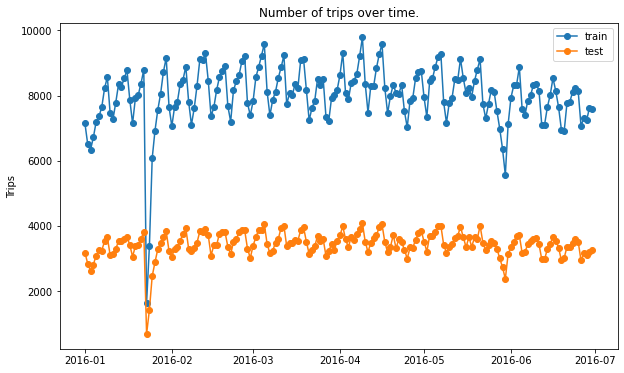

In [ ]:
plt.plot(train_df.groupby('pickup_date').count()[['id']], 'o-', label='train')
plt.plot(test_df.groupby('pickup_date').count()[['id']], 'o-', label='test')
plt.title('Number of trips over time.')
plt.legend(loc=0)
plt.ylabel('Trips')
plt.show()

Both of the train and test data almost have the same pattern. We can see a signficat drop in the number of trips around the last of the Jan. and begining of Feb. and another drop after 4 months.

## Vendors

In [ ]:
def plot_bar(data, title, ylabel):
  plt.subplots(1,1,figsize=(17,10))
  plt.ylim(ymin=800)
  plt.ylim(ymax=1100)
  sns.barplot(data.index, data.values)
  plt.title(title)
  plt.legend(loc=0)
  plt.ylabel(ylabel)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


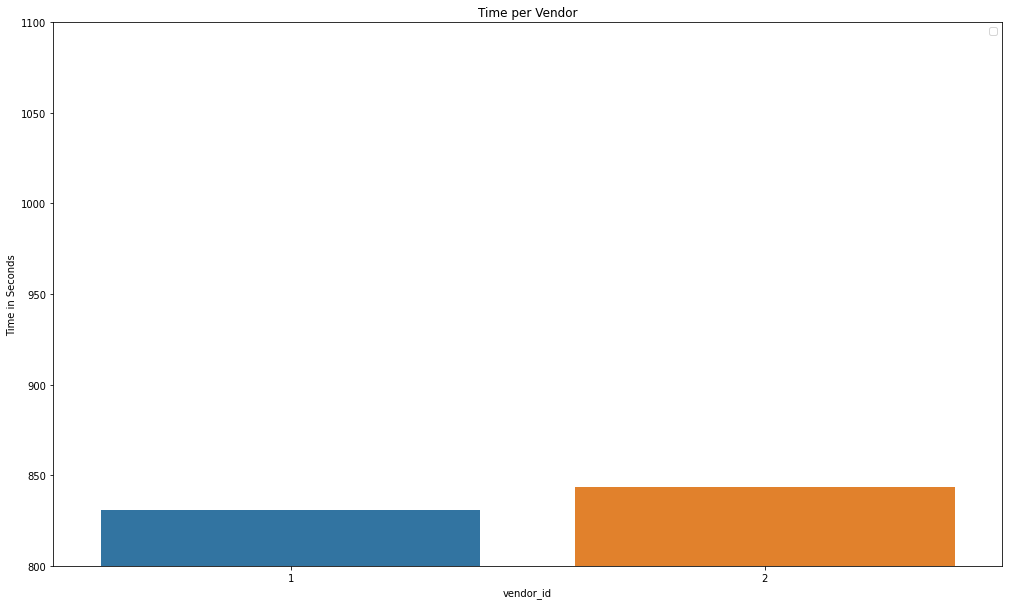

In [ ]:
vendor_mean = train_df.groupby('vendor_id')['trip_duration'].mean()
plot_bar(vendor_mean, 'Time per Vendor', 'Time in Seconds')

It doesn't look that there is a significant difference between the two vendors. They are almost the same.

## Store and Forward

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


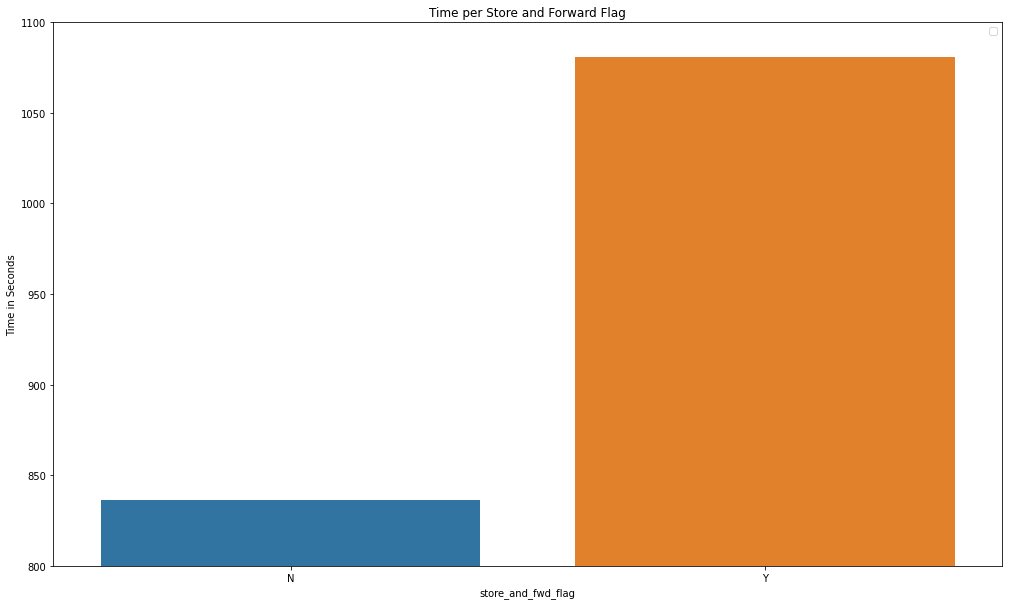

In [ ]:
snw_mean = train_df.groupby('store_and_fwd_flag')['trip_duration'].mean()
plot_bar(snw_mean, 'Time per Store and Forward Flag', 'Time in Seconds')

There is some difference between the stored trips and the disconnected ones.

## Passenger Count

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


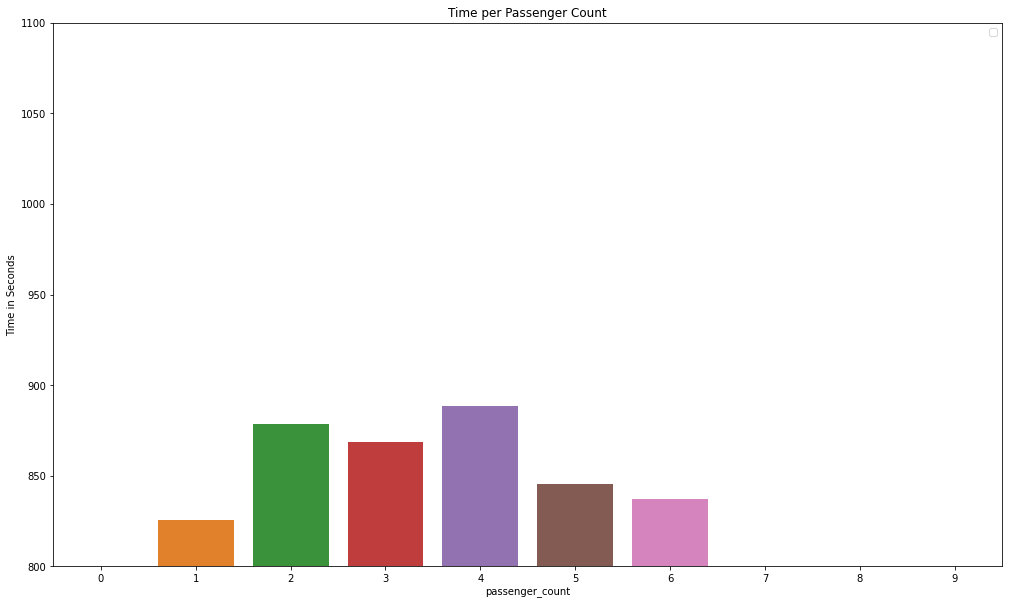

In [ ]:
pc_mean = train_df.groupby('passenger_count')['trip_duration'].mean()
plot_bar(pc_mean, 'Time per Passenger Count', 'Time in Seconds')

No significant difference evident that could be explained by the number of passengers in the vehicle for any given trip.

# Distance Calculation

We can calculate the haversine distance which is the great-circle distance between two points on a sphere given their longitudes and latitudes. Also, we can then calculate the summed distance traveled in Manhattan. Finally, we can calculate the direction (or bearing) of the distance traveled. These calculations are stored as variables in the separate data sets.

In [ ]:
R = 6371

# The haversine distance which is the great-circle distance between two points on a sphere given their longitudes and latitudes
def haversine_distance(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * R * np.arcsin(np.sqrt(d))
    return h

def manhattan_distance(lat1, lng1, lat2, lng2):
    a = haversine_distance(lat1, lng1, lat1, lng2)
    b = haversine_distance(lat1, lng1, lat2, lng1)
    return a + b

def direction(lat1, lng1, lat2, lng2):
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))

In [ ]:
train_df.loc[:, 'haversine_distance'] = haversine_distance(train_df.pickup_latitude.values, train_df.pickup_longitude.values, train_df.dropoff_latitude.values, train_df.dropoff_longitude.values)
train_df.loc[:, 'manhattan_distance'] = manhattan_distance(train_df.pickup_latitude.values, train_df.pickup_longitude.values, train_df.dropoff_latitude.values, train_df.dropoff_longitude.values)
train_df.loc[:, 'direction'] = direction(train_df.pickup_latitude.values, train_df.pickup_longitude.values, train_df.dropoff_latitude.values, train_df.dropoff_longitude.values)

test_df.loc[:, 'haversine_distance'] = haversine_distance(test_df.pickup_latitude.values, test_df.pickup_longitude.values, test_df.dropoff_latitude.values, test_df.dropoff_longitude.values)
test_df.loc[:, 'manhattan_distance'] = manhattan_distance(test_df.pickup_latitude.values, test_df.pickup_longitude.values, test_df.dropoff_latitude.values, test_df.dropoff_longitude.values)
test_df.loc[:, 'direction'] = direction(test_df.pickup_latitude.values, test_df.pickup_longitude.values, test_df.dropoff_latitude.values, test_df.dropoff_longitude.values)

In [ ]:
train_df.sample(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,day,hour,month,week,log_trip_duration,haversine_distance,manhattan_distance,direction
1161896,id0697252,2,2016-04-12 22:22:56,2016-04-12 23:00:46,1,-73.791,40.644,-73.986,40.760,N,2270,2016-04-12,12,22,4,1,7.728,20.895,29.343,-51.944
120648,id3130212,2,2016-01-29 06:16:42,2016-01-29 06:51:13,1,-73.948,40.785,-73.804,40.649,N,2071,2016-01-29,29,6,1,4,7.636,19.371,27.226,141.072
865677,id0843609,2,2016-02-23 21:09:51,2016-02-23 21:30:55,1,-73.961,40.765,-73.999,40.742,N,1264,2016-02-23,23,21,2,1,7.143,4.049,5.690,-128.576
296194,id0332260,1,2016-06-03 22:09:32,2016-06-03 22:25:59,1,-74.007,40.726,-73.997,40.679,N,987,2016-06-03,3,22,6,4,6.896,5.206,5.925,171.408
980558,id0836717,2,2016-06-08 16:55:13,2016-06-08 18:20:38,1,-73.782,40.645,-73.985,40.728,N,5125,2016-06-08,8,16,6,2,8.542,19.473,26.393,-61.597
1320330,id2821371,2,2016-04-22 14:24:43,2016-04-22 14:28:17,1,-73.968,40.768,-73.962,40.770,N,214,2016-04-22,22,14,4,4,5.371,0.561,0.771,58.770
325383,id3007796,2,2016-02-27 09:54:00,2016-02-27 10:20:29,1,-73.864,40.770,-73.986,40.754,N,1589,2016-02-27,27,9,2,5,7.371,10.430,12.028,-99.601
54689,id0931600,2,2016-04-14 21:01:27,2016-04-14 21:23:10,2,-73.979,40.752,-74.004,40.716,N,1303,2016-04-14,14,21,4,3,7.173,4.527,6.140,-151.421
819138,id0354455,1,2016-02-18 19:11:57,2016-02-18 19:20:02,2,-73.983,40.723,-73.959,40.710,N,485,2016-02-18,18,19,2,3,6.186,2.490,3.471,125.254
355869,id1818756,2,2016-05-10 18:27:25,2016-05-10 18:37:40,6,-73.955,40.780,-73.974,40.784,N,615,2016-05-10,10,18,5,1,6.423,1.674,1.985,-78.001


# Distance Clustering

We can create neighborhoods of distances. For example, splitting the pickup points into clusters or locations.

In [ ]:
# Create the coordinates stack
coords = np.vstack((train_df[['pickup_latitude', 'pickup_longitude']].values, train_df[['dropoff_latitude', 'dropoff_longitude']].values))
# KMeans clustering
indices = np.random.permutation(len(coords))[:500000]
kmeans = MiniBatchKMeans(n_clusters=100, batch_size=10000).fit(coords[indices])

In [ ]:
# Create the clusters
train_df.loc[:, 'pickup_cluster'] = kmeans.predict(train_df[['pickup_latitude', 'pickup_longitude']])
train_df.loc[:, 'dropoff_cluster'] = kmeans.predict(train_df[['dropoff_latitude', 'dropoff_longitude']])
test_df.loc[:, 'pickup_cluster'] = kmeans.predict(test_df[['pickup_latitude', 'pickup_longitude']])
test_df.loc[:, 'dropoff_cluster'] = kmeans.predict(test_df[['dropoff_latitude', 'dropoff_longitude']])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but MiniBatchKMeans was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but MiniBatchKMeans was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but MiniBatchKMeans was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but MiniBatchKMeans was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


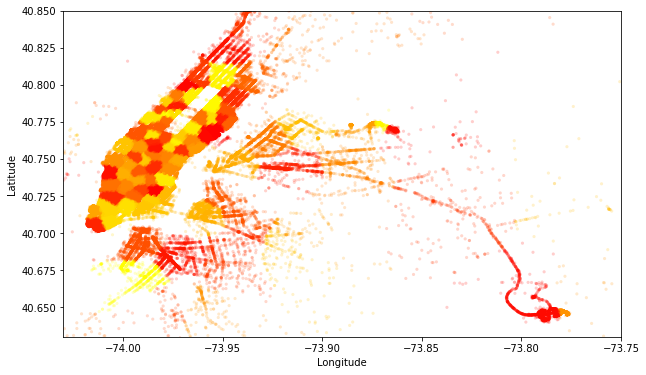

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,day,hour,month,week,log_trip_duration,haversine_distance,manhattan_distance,direction,pickup_cluster,dropoff_cluster
185670,id0521624,1,2016-01-09 15:17:17,2016-01-09 15:36:13,1,-73.961,40.773,-74.000,40.726,N,...,9,15,1,5,7.036,6.136,8.465,-147.666,45,52
888068,id0629614,2,2016-02-22 20:23:38,2016-02-22 20:35:28,1,-73.954,40.767,-73.947,40.797,N,...,22,20,2,0,6.567,3.370,3.877,9.444,1,18
900065,id1983677,2,2016-02-01 17:47:02,2016-02-01 17:59:23,1,-73.968,40.763,-73.954,40.784,N,...,1,17,2,0,6.609,2.608,3.475,25.443,53,97
1047613,id3992257,1,2016-06-29 00:47:47,2016-06-29 00:56:16,1,-73.982,40.763,-73.991,40.758,N,...,29,0,6,2,6.234,0.952,1.340,-129.210,15,59
736622,id1704304,1,2016-06-26 20:42:09,2016-06-26 20:51:54,2,-73.977,40.752,-73.977,40.777,N,...,26,20,6,6,6.373,2.693,2.726,0.711,51,41
1434395,id3901956,1,2016-01-31 00:34:41,2016-01-31 01:10:01,1,-73.994,40.727,-73.991,40.759,N,...,31,0,1,6,7.660,3.485,3.672,3.161,39,59
769877,id1914870,1,2016-02-23 12:20:05,2016-02-23 12:49:53,1,-73.979,40.764,-74.000,40.726,N,...,23,12,2,1,7.489,4.684,6.132,-157.220,28,16
705935,id3334004,2,2016-04-01 08:11:34,2016-04-01 08:20:22,1,-73.981,40.772,-73.979,40.759,N,...,1,8,4,4,6.271,1.411,1.583,172.516,37,84
279682,id2881653,1,2016-04-04 07:27:54,2016-04-04 07:40:58,1,-73.952,40.785,-73.975,40.756,N,...,4,7,4,0,6.666,3.737,5.140,-148.400,97,84
59619,id2729208,2,2016-02-28 08:13:45,2016-02-28 08:22:25,1,-74.004,40.722,-73.995,40.755,N,...,28,8,2,6,6.256,3.723,4.409,11.853,16,25


In [ ]:
# Visualize the KMeans
fig, ax = plt.subplots(ncols=1, nrows=1)
ax.scatter(train_df.pickup_longitude.values[:500000], train_df.pickup_latitude.values[:500000], s=10, lw=0, c=train_df.pickup_cluster[:500000].values, cmap='autumn', alpha=0.2)
ax.set_xlim((-74.03, -73.75))
ax.set_ylim((40.63, 40.85))
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()
train_df.sample(10)

# Feature Extraction

In [ ]:
numerical_cols = ['haversine_distance', 'manhattan_distance', 'direction', 'pickup_cluster', 'dropoff_cluster']
categorical_cols = ['vendor_id', 'passenger_count', 'store_and_fwd_flag', 'day', 'hour', 'month', 'week' ]

# Normalize the numerical columns to make sure they use the same scale
scaler = MinMaxScaler().fit(train_df[numerical_cols])
train_df[numerical_cols] = scaler.transform(train_df[numerical_cols])
test_df[numerical_cols] = scaler.transform(test_df[numerical_cols])

# Convert categorical data into dummy or indicator variables.
# We have few categorical columns and few classes for each column
# So, we can use the OneHotEncoder
def encode_categorical(df):
    for categorical in categorical_cols:
        encoded_cat = pd.get_dummies(df[categorical], prefix=categorical, prefix_sep='_')
        df = (df.drop([categorical], axis=1)).join(encoded_cat)
    return df
train_df = encode_categorical(train_df)
test_df = encode_categorical(test_df)

In [ ]:
train_df.sample(10)

,id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_date,log_trip_duration,...,month_4,month_5,month_6,week_0,week_1,week_2,week_3,week_4,week_5,week_6
116655,id2999599,2016-01-12 15:58:35,2016-01-12 16:23:40,-74.001,40.758,-73.959,40.773,1505,2016-01-12,7.317,...,0,0,0,0,1,0,0,0,0,0
1274554,id1893934,2016-04-20 22:23:43,2016-04-20 22:27:42,-73.989,40.727,-73.997,40.725,239,2016-04-20,5.481,...,1,0,0,0,0,1,0,0,0,0
6893,id1443059,2016-06-15 14:41:13,2016-06-15 15:03:27,-73.968,40.771,-73.977,40.790,1334,2016-06-15,7.197,...,0,0,1,0,0,1,0,0,0,0
119987,id3856978,2016-02-12 16:14:57,2016-02-12 16:24:02,-73.994,40.746,-73.981,40.751,545,2016-02-12,6.303,...,0,0,0,0,0,0,0,1,0,0
243682,id3688192,2016-04-02 01:49:15,2016-04-02 01:57:50,-73.990,40.732,-74.007,40.739,515,2016-04-02,6.246,...,1,0,0,0,0,0,0,0,1,0
689258,id3554701,2016-03-16 08:37:59,2016-03-16 08:59:19,-73.985,40.780,-73.970,40.759,1280,2016-03-16,7.155,...,0,0,0,0,0,1,0,0,0,0
638934,id1355379,2016-03-19 08:31:43,2016-03-19 08:35:20,-73.981,40.747,-73.973,40.756,217,2016-03-19,5.384,...,0,0,0,0,0,0,0,0,1,0
461567,id1612261,2016-05-04 22:36:48,2016-05-04 22:57:19,-74.017,40.708,-73.991,40.756,1231,2016-05-04,7.116,...,0,1,0,0,0,1,0,0,0,0
105391,id0771896,2016-03-01 16:31:41,2016-03-01 16:37:10,-73.961,40.764,-73.951,40.767,329,2016-03-01,5.799,...,0,0,0,0,1,0,0,0,0,0
817788,id3827939,2016-01-22 10:06:56,2016-01-22 10:26:55,-73.997,40.747,-73.984,40.776,1199,2016-01-22,7.090,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
train_drop_cols = ['id', 'pickup_datetime', 'dropoff_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'pickup_date', 'log_trip_duration']
train_df = train_df.drop(train_drop_cols, axis = 1)
train_df.sample(10)

,trip_duration,haversine_distance,manhattan_distance,direction,pickup_cluster,dropoff_cluster,vendor_id_1,vendor_id_2,passenger_count_0,passenger_count_1,...,month_4,month_5,month_6,week_0,week_1,week_2,week_3,week_4,week_5,week_6
58613,1731,0.003,0.004,0.330,0.677,0.071,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
514865,336,0.002,0.002,0.607,0.919,0.606,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
169353,823,0.004,0.005,0.567,0.838,0.788,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0
836469,426,0.001,0.002,0.073,0.687,0.162,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
810520,641,0.003,0.003,0.092,0.606,0.424,1,0,0,1,...,0,0,1,0,0,0,1,0,0,0
1296228,546,0.001,0.001,0.445,0.929,0.889,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
224964,837,0.002,0.003,0.933,0.566,0.263,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
589863,645,0.001,0.002,0.025,0.374,0.071,1,0,0,1,...,1,0,0,0,0,1,0,0,0,0
1280083,234,0.003,0.003,0.582,0.061,0.333,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
1063788,1786,0.005,0.005,0.515,0.424,0.818,0,1,0,1,...,0,0,1,0,0,0,1,0,0,0


In [ ]:
test_drop_cols = ['id', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'pickup_date']
test_df = test_df.drop(test_drop_cols, axis = 1)

In [ ]:
test_df.sample(10)

,haversine_distance,manhattan_distance,direction,pickup_cluster,dropoff_cluster,vendor_id_1,vendor_id_2,passenger_count_0,passenger_count_1,passenger_count_2,...,month_4,month_5,month_6,week_0,week_1,week_2,week_3,week_4,week_5,week_6
211517,0.003,0.004,0.159,0.535,0.061,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
587520,0.002,0.003,0.657,0.838,0.919,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
354182,0.018,0.023,0.365,0.040,0.414,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
221366,0.002,0.002,0.636,0.687,0.071,1,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
112607,0.001,0.001,0.156,0.404,0.182,1,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
612454,0.001,0.001,0.576,0.646,0.838,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
140736,0.002,0.002,0.034,0.283,0.172,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
210452,0.002,0.002,0.178,0.808,0.646,0,1,0,1,0,...,1,0,0,0,0,0,0,0,1,0
23011,0.001,0.001,0.728,0.525,0.000,1,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
527908,0.003,0.003,0.070,0.222,0.232,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# The test_df has 83 columns while train_df has 86 columns 
missed_cols = list(set(train_df.columns) - set(test_df.columns))
missed_cols

['passenger_count_8', 'trip_duration', 'passenger_count_7']

In [ ]:
test_df['passenger_count_7'] = 0
test_df['passenger_count_8'] = 0
test_df = test_df[list(train_df.columns.values)[1:]]
test_df.sample(10)

,haversine_distance,manhattan_distance,direction,pickup_cluster,dropoff_cluster,vendor_id_1,vendor_id_2,passenger_count_0,passenger_count_1,passenger_count_2,...,month_4,month_5,month_6,week_0,week_1,week_2,week_3,week_4,week_5,week_6
387569,0.002,0.002,0.593,0.556,0.606,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
572659,0.004,0.005,0.580,0.919,0.869,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
23181,0.004,0.006,0.099,0.121,0.424,1,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
285504,0.007,0.009,0.675,0.061,0.747,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
579162,0.001,0.001,0.078,0.485,0.293,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
123564,0.002,0.003,0.057,0.172,0.879,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,0
416823,0.005,0.005,0.046,0.333,0.646,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
518264,0.002,0.003,0.588,0.949,0.455,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
78828,0.001,0.001,0.541,0.667,0.949,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
145920,0.007,0.008,0.711,0.192,0.616,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,0


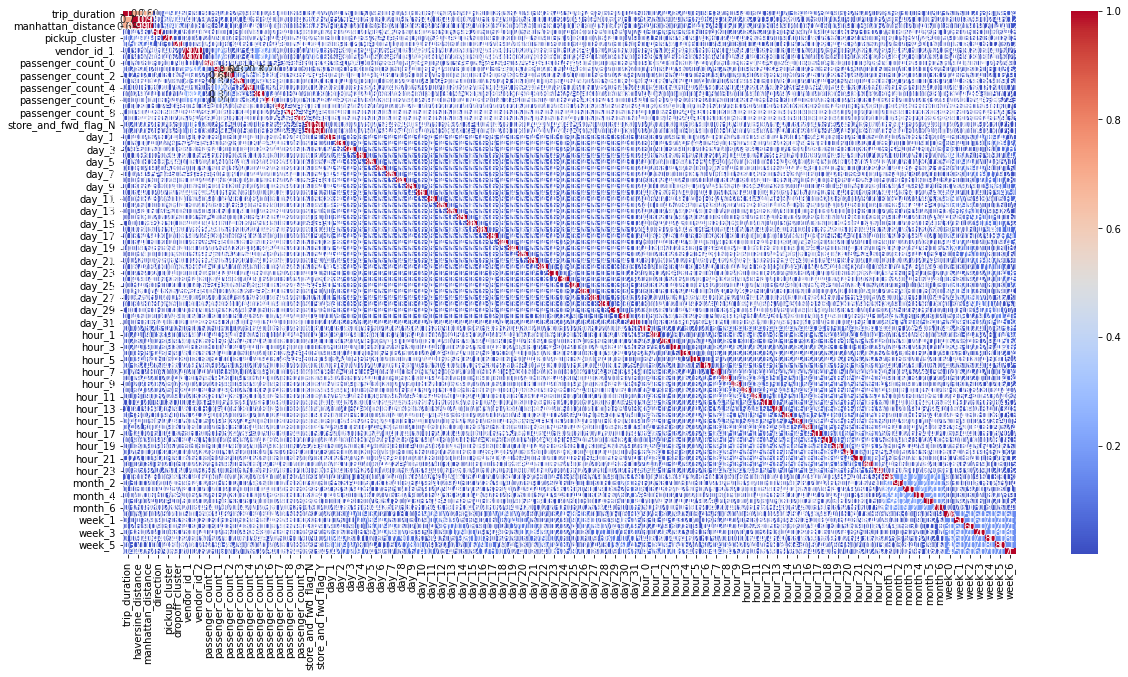

In [ ]:
plt.figure(figsize= (20,10))
corelation = train_df.corr()
sns.heatmap(abs(corelation), annot=True, cmap='coolwarm')

In [ ]:
train_df.to_csv('/content/drive/MyDrive/Machine/proc_data/train_processed.csv', index=False)
test_df.to_csv('/content/drive/MyDrive/Machine/proc_data/test_processed.csv', index=False)

# Training

In [ ]:
def zero_rule(train, test):
  y = train.trip_duration
  baseline_prediction = sum(y) / float(len(y))
  predicted = [baseline_prediction for i in range(len(test))]
  return predicted

In [ ]:
train_df.columns

Index(['trip_duration', 'haversine_distance', 'manhattan_distance',
       'direction', 'pickup_cluster', 'dropoff_cluster', 'vendor_id_1',
       'vendor_id_2', 'passenger_count_0', 'passenger_count_1',
       'passenger_count_2', 'passenger_count_3', 'passenger_count_4',
       'passenger_count_5', 'passenger_count_6', 'passenger_count_7',
       'passenger_count_8', 'passenger_count_9', 'store_and_fwd_flag_N',
       'store_and_fwd_flag_Y', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5',
       'day_6', 'day_7', 'day_8', 'day_9', 'day_10', 'day_11', 'day_12',
       'day_13', 'day_14', 'day_15', 'day_16', 'day_17', 'day_18', 'day_19',
       'day_20', 'day_21', 'day_22', 'day_23', 'day_24', 'day_25', 'day_26',
       'day_27', 'day_28', 'day_29', 'day_30', 'day_31', 'hour_0', 'hour_1',
       'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8',
       'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14',
       'hour_15', 'hour_16', 'hour_17', 'hour_18', 'ho

In [ ]:
models = {
    "random_forest": RandomForestRegressor(n_jobs = -1, random_state = 42),
    "linear_regression": LinearRegression(),
    "ridge": Ridge(alpha = 0.01),
    "linear_svm": svm.LinearSVR(C = 0.3, max_iter = 10000, epsilon = 0.4, random_state = 42),
    "rbf_svm": svm.SVC(kernel='rbf'),
    "poly_svm": svm.SVC(kernel='poly'),
    "xgboost": XGBRegressor(random_state = 42, n_jobs = -1, gamma = 0.01, learning_rate = 0.01, n_estimators = 200)
}

In [ ]:
models['linear_regression'].get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [ ]:
def run_expirement(size, model_name, do_resample = False):
  data = train_df[0:size]
  if do_resample:
    data = resample(train_df, n_samples=size)

  train_data, val_data = train_test_split(data, test_size=0.2, random_state=42)
  
  train_X = train_data.drop(['trip_duration'], axis=1)
  train_y = train_data["trip_duration"]
  val_X = val_data.drop(['trip_duration'], axis=1)
  val_y = val_data["trip_duration"]

  print(train_X.shape, train_y.shape)

  print("Training...")
  model = models[model_name]
  model.fit(train_X, train_y)
  print("Training Done...")

  pickle.dump(model, open('/content/drive/MyDrive/Machine/models_v2/'+str(model_name)+'_'+str(size)+'.sav', 'wb'))
  print("Models Saved...")

  print("Evaluating...")
  score = model.score(val_X, val_y), model.score(train_X, train_y)
  print("Score: ", score)

  print("Prediction...")
  train_preds = model.predict(train_X)
  train_preds = np.where(train_preds < 0, 0, train_preds)
  train_rmsle = mean_squared_log_error(train_y, train_preds, squared=False)
  print(str(size) + " Training RMSLE: ", train_rmsle)

  val_preds = model.predict(val_X)
  val_preds = np.where(val_preds < 0, 0, val_preds)
  val_rmsle = mean_squared_log_error(val_y, val_preds, squared=False)
  print(str(size) + " Validation RMSLE: ", val_rmsle)

In [ ]:
def save_submission(size, model_name):
  submission_df = pd.read_csv(data_dir + '/sample_submission.csv')
  model = pickle.load(open('/content/drive/MyDrive/Machine/models_v2/'+str(model_name)+'_'+str(size)+'.sav', 'rb'))
  test_preds = model.predict(test_df)
  submission_df['trip_duration'] = test_preds
  submission_df.to_csv('/content/drive/MyDrive/Machine/data/submission_'+str(model_name)+'_'+str(size)+'.csv', index=None)
  submission_df.sample(10)

In [ ]:
# run_expirement(train_df.shape[0], "xgboost")
# save_submission(train_df.shape[0], "xgboost")

In [ ]:
models["xgboost"] = XGBRegressor(random_state = 42, n_jobs = -1, learning_rate = 0.2, max_depth = 10, min_samples_ = 40, n_estimators = 200, tree_method = 'gpu_hist')

In [ ]:
# run_expirement(train_df.shape[0], "xgboost")
# save_submission(train_df.shape[0], "xgboost")

In [ ]:
# run_expirement(train_df.shape[0], "linear_regression")
# save_submission(train_df.shape[0], "linear_regression")

In [ ]:
# run_expirement(train_df.shape[0], "linear_svm")
# save_submission(train_df.shape[0], "linear_svm")

In [ ]:
# run_expirement(train_df.shape[0], "random_forest")
# save_submission(train_df.shape[0], "random_forest")